In [1]:
import graficas as g
import matplotlib.pyplot as plt
import time
import numpy as np
import importlib
import entropia as en

In [2]:
importlib.reload(g)

<module 'graficas' from 'C:\\proyectos\\repositorios\\pt_robustez\\graficas.py'>

In [4]:
n = 1000
m = 15
num_simulaciones = 50

In [5]:
#Lo que queremos hacer es hacer simulaciones atacando la misma red

matriz_BA_fallos = []
matriz_WS_fallos = []

inicio = time.time()

for i in range(num_simulaciones):
    #print(f"Vamos a hacer la ",i+1,"-ésima simulación")
    G_BA = g.crear_grafica('barabasi',n,m,0)
    G_WS = g.crear_grafica('watts',n,2*m,0.5)

    N = len(G_BA)

    AD_BA_fallos = []
    AD_WS_fallos = []

    for j in range(N):
        AD_BA_fallos.append(g.grado_promedio(G_BA))
        AD_WS_fallos.append(g.grado_promedio(G_WS))

        G_BA,_ = g.ataques(G_BA,'random')
        G_WS,_ = g.ataques(G_WS,'random')

    matriz_BA_fallos.append(AD_BA_fallos)
    matriz_WS_fallos.append(AD_WS_fallos)

final = time.time()

print(f"El tiempo total de ejecución fue: {final-inicio}")


El tiempo total de ejecución fue: 15.758712530136108


In [6]:
#Ahora vamos a hacer 
num_simulaciones = 50

matriz_BA_ataques = []
matriz_WS_ataques = []

inicio = time.time()

for i in range(num_simulaciones):
    #print(f"Vamos a hacer la ",i+1,"-ésima simulación")
    G_BA = g.crear_grafica('barabasi',n,m,0)
    G_WS = g.crear_grafica('watts',n,2*m,0.5)

    N = len(G_BA)

    AD_BA_ataques = []
    AD_WS_ataques = []

    for j in range(N):
        AD_BA_ataques.append(g.grado_promedio(G_BA))
        AD_WS_ataques.append(g.grado_promedio(G_WS))

        G_BA,_ = g.ataques(G_BA,'degree')
        G_WS,_ = g.ataques(G_WS,'degree')

    matriz_BA_ataques.append(AD_BA_ataques)
    matriz_WS_ataques.append(AD_WS_ataques)

final = time.time()

print(f"El tiempo total de ejecución fue: {final-inicio}")

El tiempo total de ejecución fue: 27.150104522705078


In [7]:
#Con lo anterior tenemos 50 listas en dónde guardamos los resultados de las simulaciones y ahora vamos a hacer
#una ponderación de los resultados en el i-ésimo ataque para así obtener un resultado más confiable

resultados_AD_BA_fallos = [sum(col) / num_simulaciones for col in zip(*matriz_BA_fallos)]
resultados_AD_WS_fallos = [sum(col)/num_simulaciones for col in zip(*matriz_WS_fallos)]

resultados_AD_BA_ataques = [sum(col) / num_simulaciones for col in zip(*matriz_BA_ataques)]
resultados_AD_WS_ataques = [sum(col) / num_simulaciones for col in zip(*matriz_WS_ataques)]


In [8]:
#Ahora vamos a construir simulaciones para la densidad

num_simulaciones = 50

matriz_BA_fallos = []
matriz_WS_fallos = []

inicio = time.time()

for i in range(num_simulaciones):
    #print(f"Vamos a hacer la ",i+1,"-ésima simulación")
    G_BA = g.crear_grafica('barabasi',n,m,0)
    G_WS = g.crear_grafica('watts',n,m+m,0.5)

    N = len(G_BA)

    D_BA_fallos = []
    D_WS_fallos = []

    for j in range(N):
        D_BA_fallos.append(g.densidad(G_BA,N))
        D_WS_fallos.append(g.densidad(G_WS,N))

        G_BA,_ = g.ataques(G_BA,'random')
        G_WS,_ = g.ataques(G_WS,'random')

    matriz_BA_fallos.append(D_BA_fallos)
    matriz_WS_fallos.append(D_WS_fallos)

final = time.time()

print(f"El tiempo total de ejecución fue: {final-inicio}")


El tiempo total de ejecución fue: 15.606208324432373


In [9]:

num_simulaciones = 50

matriz_BA_ataques = []
matriz_WS_ataques = []

inicio = time.time()

for i in range(num_simulaciones):
    #print(f"Vamos a hacer la ",i+1,"-ésima simulación")
    G_BA = g.crear_grafica('barabasi',n,m,0)
    G_WS = g.crear_grafica('watts',n,m+m,0.5)

    N = len(G_BA)

    D_BA_ataques = []
    D_WS_ataques = []

    for j in range(N):
        D_BA_ataques.append(g.densidad(G_BA,N))
        D_WS_ataques.append(g.densidad(G_WS,N))

        G_BA,_ = g.ataques(G_BA,'degree')
        G_WS,_ = g.ataques(G_WS,'degree')

    matriz_BA_ataques.append(D_BA_ataques)
    matriz_WS_ataques.append(D_WS_ataques)

final = time.time()

print(f"El tiempo total de ejecución fue: {final-inicio}")

El tiempo total de ejecución fue: 27.23372173309326


In [10]:
resultados_D_BA_fallos = [sum(col) / num_simulaciones for col in zip(*matriz_BA_fallos)]
resultados_D_WS_fallos = [sum(col)/num_simulaciones for col in zip(*matriz_WS_fallos)]

resultados_D_BA_ataques = [sum(col) / num_simulaciones for col in zip(*matriz_BA_ataques)]
resultados_D_WS_ataques = [sum(col) / num_simulaciones for col in zip(*matriz_WS_ataques)]

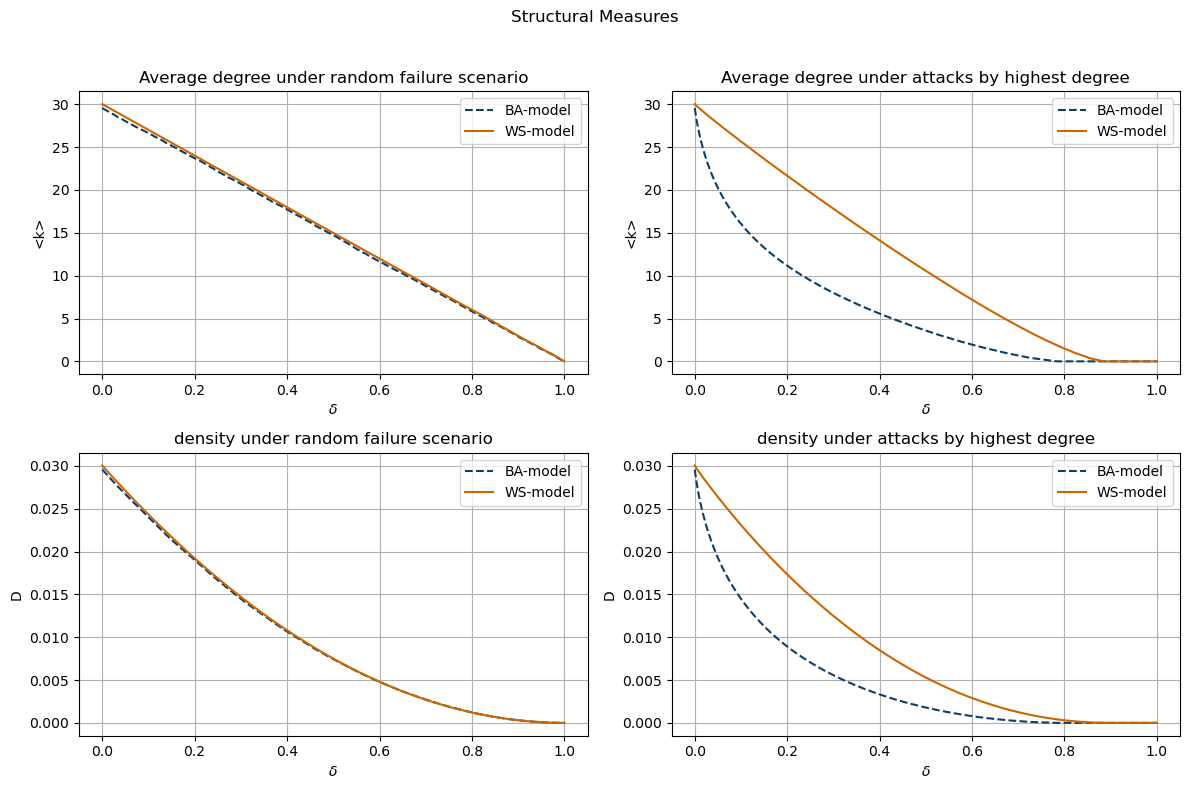

In [22]:

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

x = np.linspace(0, 1, N)

dark_blue = "#0e3d66"   # azul más oscuro
dark_orange = "#cc6600"  # naranja más oscuro

# Gráfica 1: AD - Fallos
axs[0, 0].plot(x, resultados_AD_BA_fallos, label="BA-model", linestyle='--', color=dark_blue)
axs[0, 0].plot(x, resultados_AD_WS_fallos, label="WS-model", color=dark_orange)
axs[0, 0].set_title("Average degree under random failure scenario")
axs[0, 0].legend()
axs[0, 0].set_xlabel(r'$\delta$')
axs[0, 0].set_ylabel("<k>")
axs[0, 0].grid(True)

# Gráfica 2: AD - Ataques
axs[0, 1].plot(x, resultados_AD_BA_ataques, label="BA-model", linestyle='--', color=dark_blue)
axs[0, 1].plot(x, resultados_AD_WS_ataques, label="WS-model", color=dark_orange)
axs[0, 1].set_title("Average degree under attacks by highest degree scenario")
axs[0, 1].legend()
axs[0, 1].set_xlabel(r'$\delta$')
axs[0, 1].set_ylabel("<k>")
axs[0, 1].grid(True)

# Gráfica 3: D - Fallos
axs[1, 0].plot(x, resultados_D_BA_fallos, label="BA-model", linestyle='--', color=dark_blue)
axs[1, 0].plot(x, resultados_D_WS_fallos, label="WS-model", color=dark_orange)
axs[1, 0].set_title("density under random failure scenario")
axs[1, 0].legend()
axs[1, 0].set_xlabel(r'$\delta$')
axs[1, 0].set_ylabel("D")
axs[1, 0].grid(True)

# Gráfica 4: D - Ataques
axs[1, 1].plot(x, resultados_D_BA_ataques, label="BA-model", linestyle='--', color=dark_blue)
axs[1, 1].plot(x, resultados_D_WS_ataques, label="WS-model", color=dark_orange)
axs[1, 1].set_title("density under attacks by highest degree")
axs[1, 1].legend()
axs[1, 1].set_xlabel(r'$\delta$')
axs[1, 1].set_ylabel("D")
axs[1, 1].grid(True)

plt.subplots_adjust(hspace=0.5)
plt.suptitle('Structural Measures')
plt.savefig("medidas_estructurales.png", dpi=300)

# Ajustes finales
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Deja espacio al título
plt.show()

In [5]:
G_BA = g.crear_grafica('barabasi',1000,15,0)
G_WS = g.crear_grafica('watts',1000,30,0.5)

In [7]:
entropia = en.entropia(G_BA)

In [11]:
print(entropia/entropia)

1.0
